In [1]:
import numpy as np
import arepo
import matplotlib.pyplot as plt

In [2]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [3]:
prefix = 'fgGSE0.5_fgMW0.5'
lvl = 'lvl4'
name = prefix + '-' + lvl

SFH = np.load(basepath + '/anlys/SFH/SFH_' + name + '.npy', allow_pickle=True).item()

In [4]:
def bin_sfr(t, sfr, bin_width=0.01):
    bin_left = 0.0
    bin_right = bin_left + bin_width
    
    ave_sfr = []
    ave_t = []
    
    max_val = np.max(t)
    while bin_left < max_val:
        key = np.logical_and(t >=bin_left, t<bin_right)
        ave_sfr.append(np.mean(sfr[key]))
        ave_t.append(np.mean(t[key]))
        
        bin_left += bin_width
        bin_right += bin_width
        
    return np.array(ave_t), np.array(ave_sfr)
    

Text(0, 0.5, 'SFR [Msun/yr]')

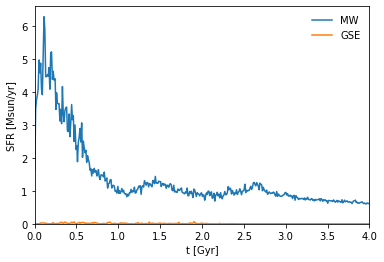

In [23]:
t, sfr = bin_sfr(SFH['Time'], SFH['SFR_MW'])

plt.plot(t, sfr, label='MW')
plt.plot(SFH['Time'], SFH['SFR_GSE'], label='GSE')
# plt.title('SF Efficiency=0.01')
plt.xlim(0, 4)
plt.ylim(0, None)

plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
# plt.xlim(0, 1)

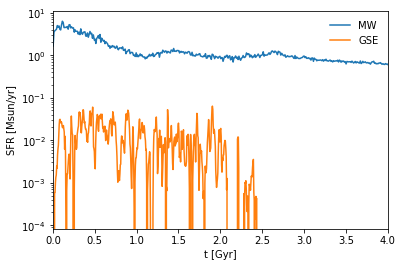

In [25]:
t, sfr = bin_sfr(SFH['Time'], SFH['SFR_MW'])

plt.plot(t, sfr, label='MW')
plt.plot(SFH['Time'], SFH['SFR_GSE'], label='GSE')
# plt.title('SF Efficiency=0.01')
plt.xlim(0, 4)
# plt.ylim(0, None)

plt.legend(frameon=False)

plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
plt.yscale('log')
# plt.xlim(0, 1)

(0.0, 4.0)

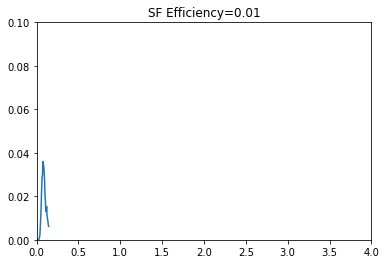

In [16]:
# plt.plot(SFH['Time'], SFH['SFR_MW'])
plt.plot(SFH['Time'], SFH['SFR_GSE'])
plt.title('SF Efficiency=0.01')
plt.ylim(0, 0.1)
plt.xlim(0, 4)
# plt.xlim(0, 1)

In [7]:
prefix = 'fgGSE0.5_fgMW0.5-COM'
lvl = 'lvl4'
name = prefix + '-' + lvl

SFH_SFE01 = np.load(basepath + '/anlys/SFH/SFH_' + name + '.npy', allow_pickle=True).item()

Text(0.5, 1.0, 'SF Efficiency=0.1')

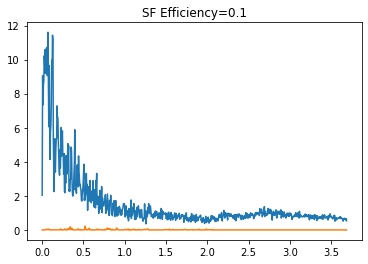

In [9]:
plt.plot(SFH_SFE01['Time'], SFH_SFE01['SFR_MW'])
plt.plot(SFH_SFE01['Time'], SFH_SFE01['SFR_GSE'])
plt.title('SF Efficiency=0.1')
# plt.xlim(0, 1)

Text(0.5, 1.0, 'SF Efficiency=0.1')

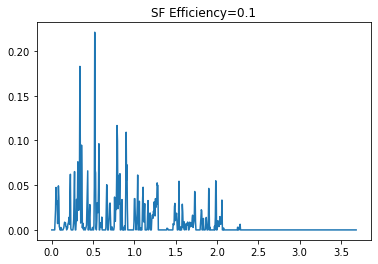

In [10]:
# plt.plot(SFH_SFE01['Time'], SFH_SFE01['SFR_MW'])
plt.plot(SFH_SFE01['Time'], SFH_SFE01['SFR_GSE'])
plt.title('SF Efficiency=0.1')
# plt.xlim(0, 1)

In [13]:
print('SFE 0.01', np.average(SFH['SFR_GSE'][SFH['Time'] < 2]))
print('SFE 0.1', np.average(SFH_SFE01['SFR_GSE'][SFH_SFE01['Time'] < 2]))

SFE 0.01 0.013748513
SFE 0.1 0.013466491


In [1]:
def bin_sfr(t, sfr, bin_width=0.01):
    bin_left = 0.0
    bin_right = bin_left + bin_width
    
    ave_sfr = []
    ave_t = []
    
    max_val = np.max(t)
    while bin_left < max_val:
        key = np.logical_and(t >=bin_left, t<bin_right)
        ave_sfr.append(np.mean(sfr[key]))
        ave_t.append(np.mean(t[key]))
        
        bin_left += bin_width
        bin_right += bin_width
        
    return np.array(ave_t), np.array(ave_sfr)
    

(0.0, 4.0)

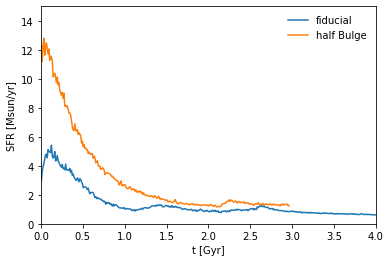

In [11]:
sfh_file = np.genfromtxt(basepath+'runs/fgGSE0.5_fgMW0.5/lvl4/output/sfr.txt')
sfh_file_noB = np.genfromtxt(basepath+'runs/fgGSE0.5_fgMW0.5_noB/lvl4/output/sfr.txt')

time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2])
time_noB, sfr_noB = bin_sfr(sfh_file_noB[:,0], sfh_file_noB[:,2])

plt.plot(time, sfr, label='fiducial')
plt.plot(time_noB, sfr_noB, label='half Bulge')
plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
plt.ylim(0, 15)
plt.xlim(0, 4)

In [8]:
sn0 = arepo.Snapshot(basepath + 'runs/fgGSE0.5_fgMW0.5_noB/lvl4/output', 0, combineFiles=True)
sn = arepo.Snapshot(basepath + 'runs/fgGSE0.5_fgMW0.5_noB/lvl4/output', 121, combineFiles=True)

In [9]:
Mg0 = np.sum(sn0.part0.mass.value)
Mg = np.sum(sn.part0.mass.value)
print(Mg0, Mg)

1.0297396 0.7734935


In [13]:
COM_file = basepath + 'anlys/COM/COM_fgGSE0.5_fgMW0.5-lvl4.npy'
COM = np.load(COM_file, allow_pickle=True).item()
COM['Tot_COM']

array([[190.38971468, 200.0018241 , 202.57631923],
       [190.43052026, 200.02347395, 202.54585167],
       [190.46387591, 200.04486029, 202.51791717],
       ...,
       [385.04856766, 319.95045135,  30.66632312],
       [385.18612546, 320.01925051,  30.5570171 ],
       [385.32508729, 320.08564974,  30.44696931]])